===================================================================================================================

# DEFINE PROBLEM

- Almost every American, it seems, gets a new credit card offer in the mail almost every week. Credit cards are highly profitable, but only if the customer stays around for a while.\
It **costs about 80 dollars** to **acquire a new credit card customer** who **returns about 120 dollars per year** in profit, but **only if she keeps the card**.\
If she **drops the card after a few weeks, or doesn’t use the card**, the issuer will **lose that 80 dollars, plus some more money spent trying to reactivate her**.\
It is a tough business.
    - Source: https://www.dbmarketing.com/articles/Art175.htm
- **Customer loyalty** is one of the **key** to survive in this competition
    - Source: https://www.dbmarketing.com/articles/Art175.htm
- The **cost of acquiring new customers** is estimated at **five times** the rate of **retaining existing ones**
    - Source : https://www.fpsc.com/the_cost_of_customer_churn.pdf
- In order to retain customers, we must first understanding our customers type and customer behaviour
- Previously, our bank only has 1 product of credit card, resulting low customer loyalty because inaccurate marketing program
- After do long research, our management decides to make 3 different products: **Business Unlimited (High), Business Cash (Medium), and Performance Business (Low)**
- In other hand, the company doesn't know which customer belongs to which products

===================================================================================================================

# DEFINE GOALS

- Understanding Customer Type and Customer Behaviour through Customer Data Clustering
- Define Product Details from Research Results
- Classify Customer Segmentation Results with the product 
- Help Marketing Team to define new Customers type through Machine Learning Modelling 
which utilized to create suitable marketing strategy (Product) to retain customers

===================================================================================================================

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dython
from dython.nominal import associations, cramers_v, correlation_ratio, theils_u
import dateparser
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 999

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.mixture import GaussianMixture

import plotly.express as px

### IMPORT FILE

In [2]:
df = pd.read_csv('CC GENERAL.csv')

### DATA TYPE OVERALL CHECK

In [3]:
df.head()

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.90               0.82      95.40              0.00   
1  C10002  3202.47               0.91       0.00              0.00   
2  C10003  2495.15               1.00     773.17            773.17   
3  C10004  1666.67               0.64    1499.00           1499.00   
4  C10005   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00       6442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2       1000.00   
1                    0.25                 4              0       7000.00   
2                    0.00                 0             12       7500.00   
3                    0.08                 1              1       7500.00   
4                    0.00                 0              1       1200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    201.80            139.51              0.00      12  
1   4103.03           1072.34              0.22      12  
2    622.07            627.28              0.00      12  
3      0.00               nan              0.00      12  
4    678.33            244.79              0.00      12

### COLUMNS DESCRIPTION

- `CUST_ID` - Identification of Credit Card Holder
- `BALANCE` - Balance amount left in their account to make purchases
- `BALANCE_FREQUENCY` - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- `PURCHASES` - Amount of purchases made from account 
- `ONEOFF_PURCHASES` - Maximum purchase amount done in one-go
- `INSTALLMENTS_PURCHASES` - Amount of purchase done in installment
- `CASH_ADVANCE` - Amount of Cash Money user take from credit card
- `PURCHASES_FREQUENCY` - How frequent the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- `ONEOFF_PURCHASES_FREQUENCY` - How frequent Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- `PURCHASES_INSTALLMENTS_FREQUENCY` - How frequent purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- `CASH_ADVANCE_FREQUENCY` - How frequent user take money from credit card
- `CASH_ADVANCE_TRX` - Number of Transactions made with "Cash in Advanced" 
- `PURCHASES_TRX ` - Number of purchase transactions made 
- `CREDIT_LIMIT` - Limit of Credit Card for user
- `PAYMENTS` - Amount of Payment done by user
- `MINIMUM_PAYMENTS` - Minimum amount of payments made by user
- `PRC_FULL_PAYMENT` - Percent of full payment paid by user
- `TENURE` - Tenure of credit card service for user

Source : https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
print(df.shape)
# The data consist of 8950 rows and 18 columns

(8950, 18)


### COLUMN SUMMARY

In [5]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [6]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

Features DataType  Null  NullPercentage  Unique  \
0                            CUST_ID   object     0            0.00    8950   
1                            BALANCE  float64     0            0.00    8871   
2                  BALANCE_FREQUENCY  float64     0            0.00      43   
3                          PURCHASES  float64     0            0.00    6203   
4                   ONEOFF_PURCHASES  float64     0            0.00    4014   
5             INSTALLMENTS_PURCHASES  float64     0            0.00    4452   
6                       CASH_ADVANCE  float64     0            0.00    4323   
7                PURCHASES_FREQUENCY  float64     0            0.00      47   
8         ONEOFF_PURCHASES_FREQUENCY  float64     0            0.00      47   
9   PURCHASES_INSTALLMENTS_FREQUENCY  float64     0            0.00      47   
10            CASH_ADVANCE_FREQUENCY  float64     0            0.00      54   
11                  CASH_ADVANCE_TRX    int64     0            0.00      65   
12                     PURCHASES_TRX    int64     0            0.00     173   
13                      CREDIT_LIMIT  float64     1            0.01     205   
14                          PAYMENTS  float64     0            0.00    8711   
15                  MINIMUM_PAYMENTS  float64   313            3.50    8636   
16                  PRC_FULL_PAYMENT  float64     0            0.00      47   
17                            TENURE    int64     0            0.00       7   

                               Unique Sample  
0                           [C16989, C11025]  
1             [90.017392, 665.2850490000001]  
2                           [0.571429, 0.25]  
3                            [693.89, 229.0]  
4                           [1587.24, 848.0]  
5                            [163.9, 218.96]  
6            [932.3697619999999, 139.395627]  
7                           [0.75, 0.714286]  
8                          [0.714286, 0.125]  
9                          [0.666667, 0.875]  
10           [0.28571399999999997, 0.181818]  
11                                  [63, 11]  
12                                 [109, 59]  
13                         [2750.0, 11300.0]  
14  [3728.7089100000003, 115.52549599999999]  
15                  [140.596138, 292.838637]  
16                      [0.916667, 0.454545]  
17                                  [10, 11]

In [7]:
## df.head(), df.shape, dfDesc is utilized to capture dataset genereal information

### DATA PREPARATION BEFORE OUTLIERS & MISSING VALUE CHECKING

Remove unecessary columns:
- Since CUST_ID has object and has no relation for analysis, we will drop CUST_ID

In [8]:
df.drop(columns = ['CUST_ID'], inplace = True)

===================================================================================================================

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [9]:
round(df.describe(),2)
## Get overview data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
count  8950.00            8950.00    8950.00           8950.00   
mean   1564.47               0.88    1003.20            592.44   
std    2081.53               0.24    2136.63           1659.89   
min       0.00               0.00       0.00              0.00   
25%     128.28               0.89      39.64              0.00   
50%     873.39               1.00     361.28             38.00   
75%    2054.14               1.00    1110.13            577.41   
max   19043.14               1.00   49039.57          40761.25   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count                 8950.00       8950.00              8950.00   
mean                   411.07        978.87                 0.49   
std                    904.34       2097.16                 0.40   
min                      0.00          0.00                 0.00   
25%                      0.00          0.00                 0.08   
50%                     89.00          0.00                 0.50   
75%                    468.64       1113.82                 0.92   
max                  22500.00      47137.21                 1.00   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                     8950.00                           8950.00   
mean                         0.20                              0.36   
std                          0.30                              0.40   
min                          0.00                              0.00   
25%                          0.00                              0.00   
50%                          0.08                              0.17   
75%                          0.30                              0.75   
max                          1.00                              1.00   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count                 8950.00           8950.00        8950.00       8949.00   
mean                     0.14              3.25          14.71       4494.45   
std                      0.20              6.82          24.86       3638.82   
min                      0.00              0.00           0.00         50.00   
25%                      0.00              0.00           1.00       1600.00   
50%                      0.00              0.00           7.00       3000.00   
75%                      0.22              4.00          17.00       6500.00   
max                      1.50            123.00         358.00      30000.00   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
count   8950.00           8637.00           8950.00 8950.00  
mean    1733.14            864.21              0.15   11.52  
std     2895.06           2372.45              0.29    1.34  
min        0.00              0.02              0.00    6.00  
25%      383.28            169.12              0.00   12.00  
50%      856.90            312.34              0.00   12.00  
75%     1901.13            825.49              0.14   12.00  
max    50721.48          76406.21              1.00   12.00

### MISSING VALUE CHECK & HANDLING

In [10]:
df.isna().sum()
## From information below, dataset have some missing value, further action will be done

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

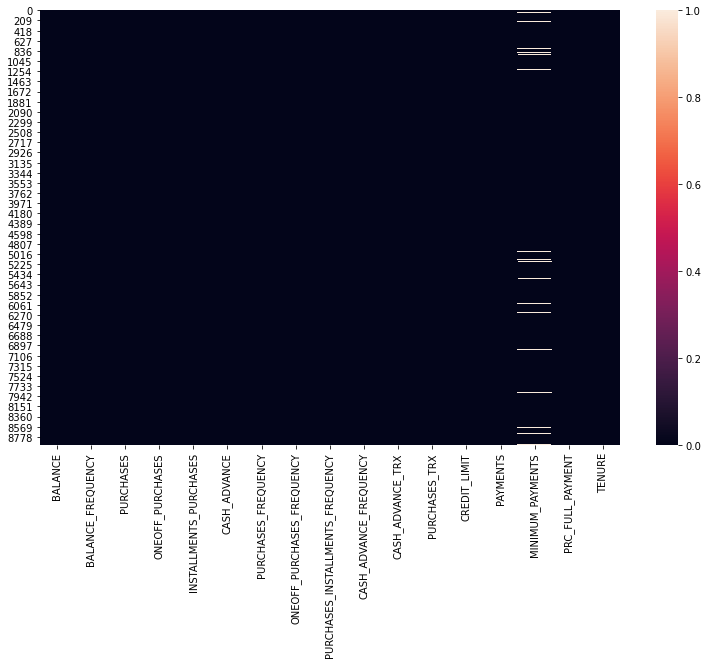

In [11]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna())
plt.show()

#### MINIMUM_PAYMENTS Missing Value Handling

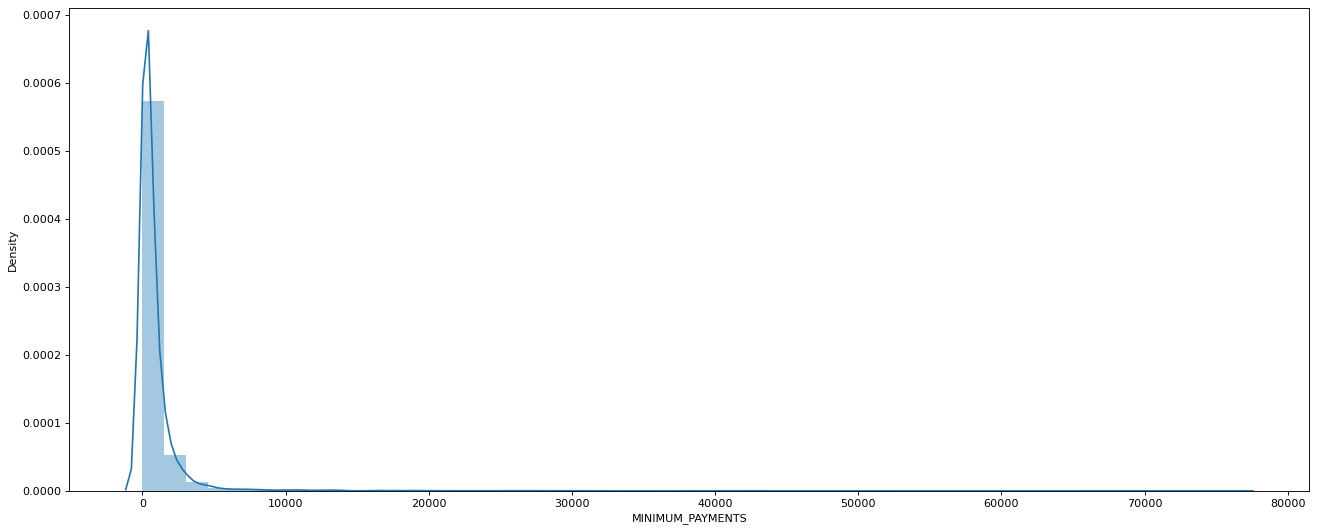

In [12]:
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['MINIMUM_PAYMENTS'])
plt.show()

In [13]:
df[df['MINIMUM_PAYMENTS'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.67               0.64    1499.00           1499.00   
45    2242.31               1.00     437.00             97.00   
47    3910.11               1.00       0.00              0.00   
54       6.66               0.64     310.00              0.00   
55    1312.00               1.00    1283.90           1283.90   
...       ...                ...        ...               ...   
8919    14.52               0.33     152.00            152.00   
8929   371.53               0.33       0.00              0.00   
8935   183.82               1.00     465.90              0.00   
8944   193.57               0.83    1012.73           1012.73   
8946    19.18               1.00     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                       0.00        205.79                 0.08   
45                    340.00        184.65                 0.33   
47                      0.00       1980.87                 0.00   
54                    310.00          0.00                 0.67   
55                      0.00          0.00                 0.25   
...                      ...           ...                  ...   
8919                    0.00          0.00                 0.33   
8929                    0.00       1465.41                 0.00   
8935                  465.90          0.00                 1.00   
8944                    0.00          0.00                 0.33   
8946                  300.00          0.00                 1.00   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                           0.08                              0.00   
45                          0.08                              0.33   
47                          0.00                              0.00   
54                          0.00                              0.67   
55                          0.25                              0.00   
...                          ...                               ...   
8919                        0.33                              0.00   
8929                        0.00                              0.00   
8935                        0.00                              0.83   
8944                        0.33                              0.00   
8946                        0.00                              0.83   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                       0.08                 1              1       7500.00   
45                      0.17                 2              5       2400.00   
47                      0.50                 7              0       4200.00   
54                      0.00                 0              8       1000.00   
55                      0.00                 0              6       6000.00   
...                      ...               ...            ...           ...   
8919                    0.00                 0              2       1500.00   
8929                    0.17                 5              0       1500.00   
8935                    0.00                 0              6       1500.00   
8944                    0.00                 0              2       4000.00   
8946                    0.00                 0              6       1000.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3         0.00               nan              0.00      12  
45        0.00               nan              0.00      12  
47        0.00               nan              0.00      12  
54      417.02               nan              0.00      12  
55        0.00               nan              0.00      12  
...        ...               ...               ...     ...  
8919      0.00               nan              0.00       6  
8929      0.00               nan              0.00       6  
8935      0.00               nan              0.00       6  
8944      0.00      

In [14]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['PAYMENTS'])
# Missing Value on MINIMUM_PAYMENTS is filled with same value of PAYMENTS because the customers have PAYMENTS data recorded 

#### CREDIT_LIMIT Missing Value Handling

Due to only 1 data has null credit_limit value, we will drop this row

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()
# All missing value have been handled and currently we have no missing value

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

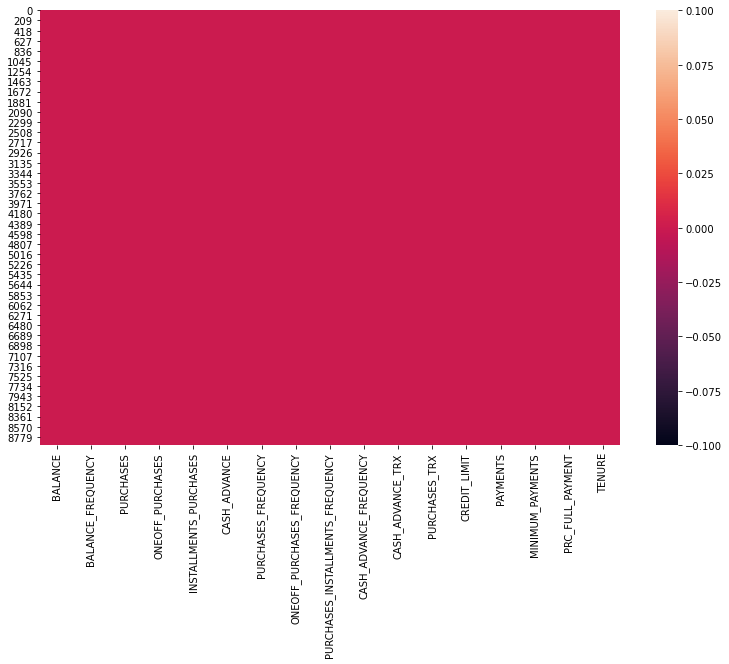

In [17]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna())
plt.show()

In [18]:
df.shape

(8949, 17)

### OUTLIERS CHECK & HANDLING

In [19]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [20]:
# function to get unique values
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            
    return unique_list

In [21]:
outliers = []
cek_outlier(df['BALANCE'])
print(len(outliers))
# print(outliers)
# There are 695 Outliers from BALANCE
# Since the outliers data is needed, BALANCE outliers will not be removed

695


In [22]:
df[df['BALANCE'].isin(outliers)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
15    6886.21               1.00    1611.70              0.00   
21    6369.53               1.00    6359.95           5910.04   
24    5368.57               1.00       0.00              0.00   
28    7152.86               1.00     387.05            204.55   
30   12136.22               1.00    3038.01           1013.20   
...       ...                ...        ...               ...   
8309  6008.91               0.78       0.00              0.00   
8411  5934.61               1.00       0.00              0.00   
8438  5484.34               1.00       0.00              0.00   
8705  7302.67               1.00       0.00              0.00   
8941  5967.48               0.83     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
15                   1611.70       2301.49                 0.50   
21                    449.91        229.03                 1.00   
24                      0.00        798.95                 0.00   
28                    182.50       2236.15                 0.67   
30                   2024.81       3183.58                 1.00   
...                      ...           ...                  ...   
8309                    0.00       8304.47                 0.00   
8411                    0.00        302.68                 0.00   
8438                    0.00       5990.59                 0.00   
8705                    0.00      10762.71                 0.00   
8941                  214.55       8555.41                 0.83   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
15                          0.00                              0.50   
21                          0.92                              1.00   
24                          0.00                              0.00   
28                          0.17                              0.42   
30                          0.17                              1.00   
...                          ...                               ...   
8309                        0.00                              0.00   
8411                        0.00                              0.00   
8438                        0.00                              0.00   
8705                        0.00                              0.00   
8941                        0.00                              0.67   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
15                      0.17                 4             11       8000.00   
21                      0.33                 6             92      11250.00   
24                      0.36                 4              0       6000.00   
28                      0.83                16              8      10500.00   
30                      0.50                10             64      13000.00   
...                      ...               ...            ...           ...   
8309                    0.33                 9              0       9000.00   
8411                    0.25                 5              0       6000.00   
8438                    0.25                14              0       6000.00   
8705                    0.75                19              0       9000.00   
8941                    0.67                13              5       9000.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
15     1993.44           2109.91              0.00      12  
21     2077.96           1659.78              0.00      12  
24     1422.73           1657.00              0.00      11  
28     1601.45           1648.85              0.00      12  
30     4230.32           3292.02              0.00      12  
...        ...               ...               ...     ...  
8309   1279.30           1404.89              0.00       9  
8411   1065.96           2394.24              0.00      12  
8438   1229.43           2453.16              0.00      12  
8705   3824.31      

In [23]:
outliers = []
cek_outlier(df['BALANCE_FREQUENCY'])
print(len(outliers))
# unique(outliers)
# There are 1493 Outliers from BALANCE_FREQUENCY
# Since the outliers data is needed, BALANCE_FREQUENCY outliers will not be removed

1492


In [24]:
outliers = []
cek_outlier(df['PURCHASES'])
print(len(outliers))
# unique(outliers)
# There are 808 Outliers from PURCHASES
# Since the outliers data is needed, PURCHASES outliers will not be removed

808


In [25]:
df[df['PURCHASES'].isin(outliers)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6      627.26               1.00    7091.01           6402.63   
12    1516.93               1.00    3217.99           2500.23   
21    6369.53               1.00    6359.95           5910.04   
23    3800.15               0.82    4248.35           3454.56   
30   12136.22               1.00    3038.01           1013.20   
...       ...                ...        ...               ...   
8689   368.32               0.91    8053.95           8053.95   
8737  2533.62               0.91    5633.83           2985.92   
8748  1042.82               0.62    3950.00           3950.00   
8758  1812.54               0.86    2918.08           2918.08   
8897   328.69               1.00    2806.78           2588.53   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38          0.00                 1.00   
12                    717.76          0.00                 1.00   
21                    449.91        229.03                 1.00   
23                    793.79       7974.42                 1.00   
30                   2024.81       3183.58                 1.00   
...                      ...           ...                  ...   
8689                    0.00          0.00                 0.83   
8737                 2647.91       2451.81                 0.92   
8748                    0.00          0.00                 0.25   
8758                    0.00          0.00                 0.57   
8897                  218.25          0.00                 0.86   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                           1.00                              1.00   
12                          0.25                              0.92   
21                          0.92                              1.00   
23                          0.08                              0.92   
30                          0.17                              1.00   
...                          ...                               ...   
8689                        0.83                              0.00   
8737                        0.50                              0.75   
8748                        0.25                              0.00   
8758                        0.57                              0.00   
8897                        0.71                              0.29   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                       0.00                 0             64      13500.00   
12                      0.00                 0             26       3000.00   
21                      0.33                 6             92      11250.00   
23                      0.33                13             13       9000.00   
30                      0.50                10             64      13000.00   
...                      ...               ...            ...           ...   
8689                    0.00                 0             46       2000.00   
8737                    0.33                16             82       9000.00   
8748                    0.00                 0              3       3150.00   
8758                    0.00                 0              5       3000.00   
8897                    0.00                 0             26       1200.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
6      6354.31            198.07              1.00      12  
12      608.26            490.21              0.25      12  
21     2077.96           1659.78              0.00      12  
23     9479.04           1425.43              0.00      12  
30     4230.32           3292.02              0.00      12  
...        ...               ...               ...     ...  
8689   7966.58            219.76              0.78      12  
8737   8176.95            602.96              0.00      12  
8748   6274.98            303.46              0.00       8  
8758    247.25      

In [26]:
outliers = []
cek_outlier(df['ONEOFF_PURCHASES'])
print(len(outliers))
# unique(outliers)
# There are 1013 Outliers from ONEOFF_PURCHASES
# Since the outliers data is needed, ONEOFF_PURCHASES outliers will not be removed

1013


In [27]:
outliers = []
cek_outlier(df['INSTALLMENTS_PURCHASES'])
print(len(outliers))
# unique(outliers)
# There are 867 Outliers from INSTALLMENTS_PURCHASES
# Since the outliers data is needed, INSTALLMENTS_PURCHASES outliers will not be removed

867


In [28]:
outliers = []
cek_outlier(df['CASH_ADVANCE'])
print(len(outliers))
# unique(outliers)
# There are 1030 Outliers from CASH_ADVANCE
# Since the outliers data is needed, CASH_ADVANCE outliers will not be removed

1030


In [29]:
outliers = []
cek_outlier(df['PURCHASES_FREQUENCY'])
print(len(outliers))
# unique(outliers)
# There are NO Outliers from PURCHASES_FREQUENCY

0


In [30]:
outliers = []
cek_outlier(df['ONEOFF_PURCHASES_FREQUENCY'])
print(len(outliers))
# unique(outliers)
# There are 782 Outliers from ONEOFF_PURCHASES_FREQUENCY
# Since the outliers data is needed, ONEOFF_PURCHASES_FREQUENCY outliers will not be removed

782


In [31]:
outliers = []
cek_outlier(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
print(len(outliers))
# unique(outliers)
# There are NO Outliers from PURCHASES_INSTALLMENTS_FREQUENCY

0


In [32]:
outliers = []
cek_outlier(df['CASH_ADVANCE_FREQUENCY'])
print(len(outliers))
# unique(outliers)
# There are 525 Outliers from CASH_ADVANCE_FREQUENCY
# Since the outliers data is needed, CASH_ADVANCE_FREQUENCY outliers will not be removed

525


In [33]:
outliers = []
cek_outlier(df['CASH_ADVANCE_TRX'])
print(len(outliers))
# unique(outliers)
# There are 804 Outliers from CASH_ADVANCE_TRX
# Since the outliers data is needed, CASH_ADVANCE_TRX outliers will not be removed

804


In [34]:
outliers = []
cek_outlier(df['PURCHASES_TRX'])
print(len(outliers))
# unique(outliers)
# There are 766 Outliers from PURCHASES_TRX
# Since the outliers data is needed, PURCHASES_TRX outliers will not be removed

766


In [35]:
outliers = []
cek_outlier(df['CREDIT_LIMIT'])
print(len(outliers))
# unique(outliers)
# There are 248 Outliers from CREDIT_LIMIT
# Since the outliers data is needed, CREDIT_LIMIT outliers will not be removed

248


In [36]:
df[df['CREDIT_LIMIT'].isin(outliers)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
85     134.92               1.00    1247.80           1247.80   
120   8504.88               1.00    6724.26           4100.08   
124  14224.12               1.00       0.00              0.00   
128  11167.23               1.00     150.64            150.64   
136   2494.87               1.00    5491.79           1390.50   
...       ...                ...        ...               ...   
6629 16259.45               1.00    5024.68           3582.45   
7046  2980.05               0.82   26784.62          26514.32   
7764 10856.48               1.00      45.65             45.65   
7962 13318.66               1.00    3504.74           3266.29   
8229   161.93               0.33    1427.83           1427.83   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
85                      0.00          0.00                 1.00   
120                  2624.18       1686.60                 1.00   
124                     0.00       4614.43                 0.00   
128                     0.00       8362.15                 0.08   
136                  4101.29          0.00                 1.00   
...                      ...           ...                  ...   
6629                 1442.23        328.70                 1.00   
7046                  270.30          0.00                 0.58   
7764                    0.00       5096.89                 0.08   
7962                  238.45       1306.85                 0.64   
8229                    0.00          0.00                 0.33   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
85                          1.00                              0.00   
120                         0.92                              1.00   
124                         0.00                              0.00   
128                         0.08                              0.00   
136                         0.50                              1.00   
...                          ...                               ...   
6629                        0.83                              1.00   
7046                        0.50                              0.08   
7764                        0.08                              0.00   
7962                        0.55                              0.27   
8229                        0.33                              0.00   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
85                      0.00                 0             22      16500.00   
120                     0.50                10             85      17000.00   
124                     0.33                 9              0      19000.00   
128                     0.50                14              1      17000.00   
136                     0.00                 0             52      17000.00   
...                      ...               ...            ...           ...   
6629                    0.08                 2            143      18000.00   
7046                    0.00                 0             33      30000.00   
7764                    0.25                 5              1      14500.00   
7962                    0.18                 3             16      17500.00   
8229                    0.00                 0             12      14000.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
85     1275.23            171.36              1.00      12  
120    1888.76           2167.45              0.00      12  
124    3066.61           3406.26              0.00      12  
128    2606.06           2894.08              0.00      12  
136    1015.31            615.92              0.00      12  
...        ...               ...               ...     ...  
6629   4987.24           5137.50              0.00      12  
7046  30029.01          11853.80              0.75      12  
7764   2670.73           2917.47              0.00      12  
7962   2594.82      

In [37]:
outliers = []
cek_outlier(df['PAYMENTS'])
print(len(outliers))
# unique(outliers)
# There are 808 Outliers from PAYMENTS
# Since the outliers data is needed, PAYMENTS outliers will not be removed

808


In [38]:
outliers = []
cek_outlier(df['MINIMUM_PAYMENTS'])
print(len(outliers))
# unique(outliers)
# There are 909 Outliers from MINIMUM_PAYMENTS
# Since the outliers data is needed, MINIMUM_PAYMENTS outliers will not be removed

895


In [39]:
outliers = []
cek_outlier(df['PRC_FULL_PAYMENT'])
print(len(outliers))
# unique(outliers)
# There are 1474 Outliers from PRC_FULL_PAYMENTS
# Since the outliers data is needed, PRC_FULL_PAYMENTS outliers will not be removed

1474


In [40]:
outliers = []
cek_outlier(df['TENURE'])
print(len(outliers))
# unique(outliers)
# There are 1365 Outliers from TENURE
# Since the outliers data is needed, TENURE outliers will not be removed

1365


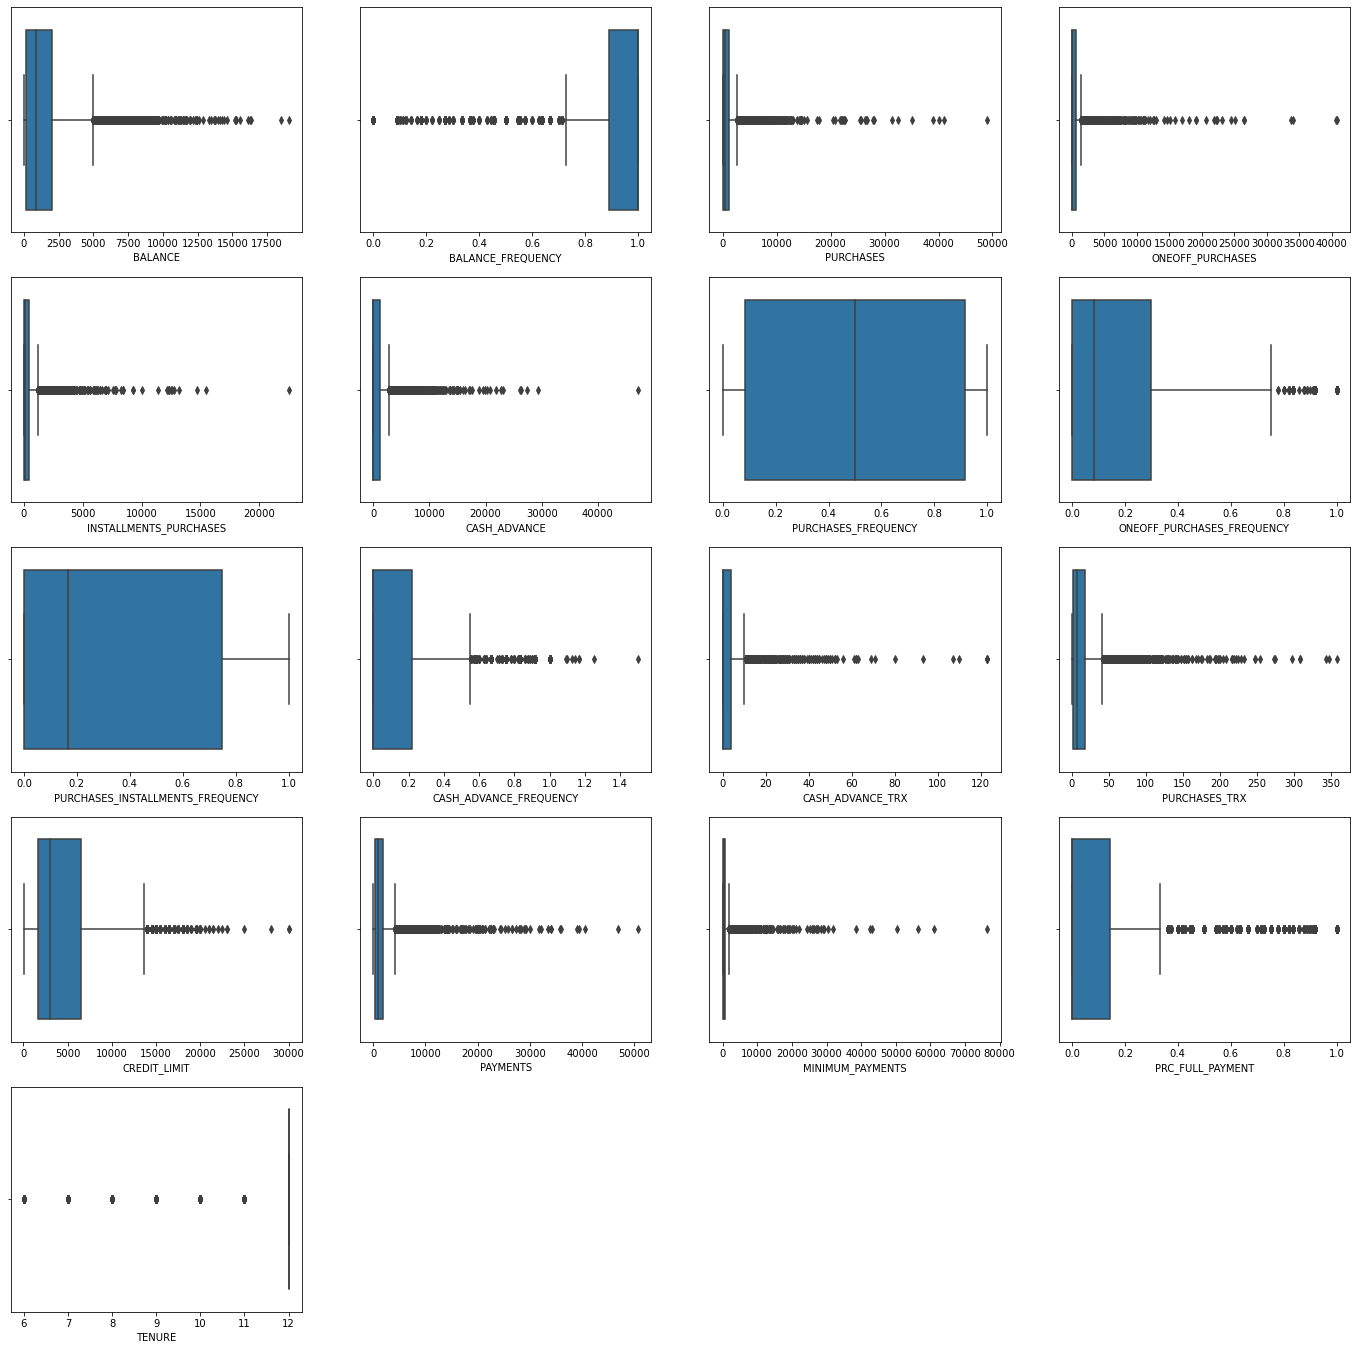

In [41]:
## Plot Boxplot For Numerical Columns to show distribution data & outliers value
df_outliers = df

plt.figure(figsize =(24, 24))
x = 1 

for column in df_outliers.columns:
    plt.subplot(5,4,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

- This outliers will not be removed since it might be useful 

===================================================================================================================

# MINI EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

### SPEARMAN CORRELATION

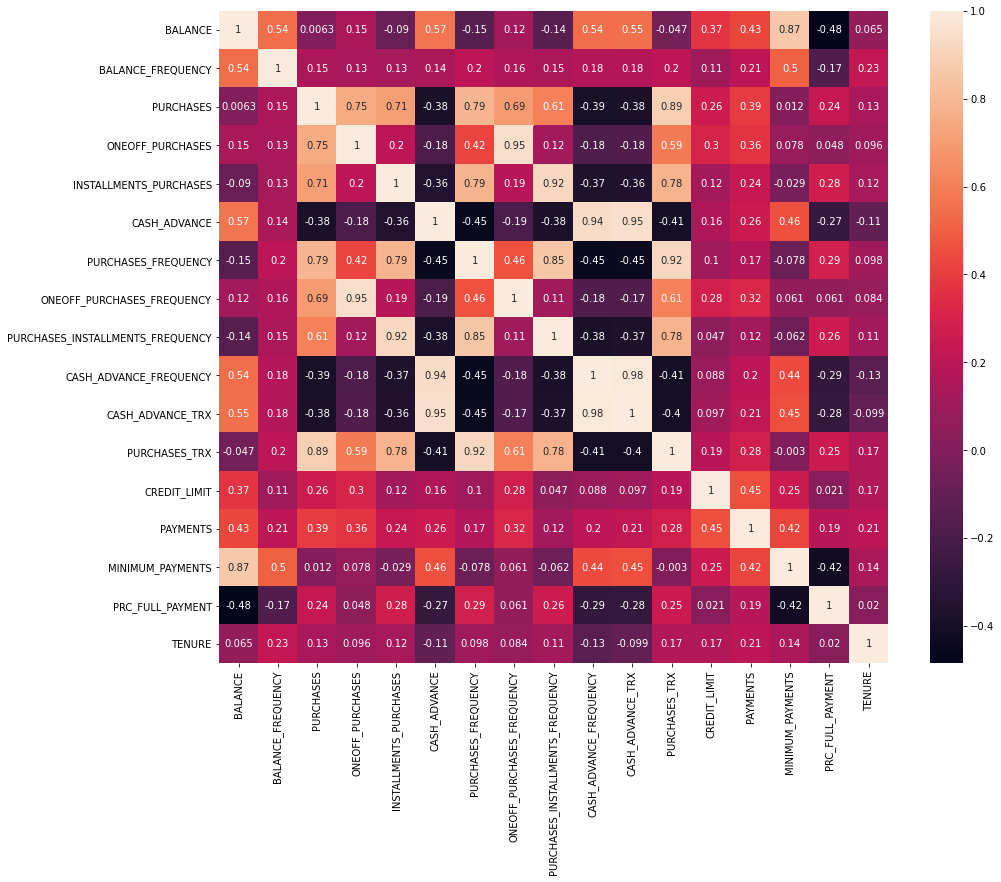

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr('spearman'), annot=True)
plt.show()

===================================================================================================================

# CLUSTERING

Based on Problems and added by research results, we utilize 3 features that might be the factors for customer segmentation:
- BALANCE
- PURCHASES
- CREDIT_LIMIT

Source :
- https://creditcards.chase.com/
- https://www.mckinsey.com/~/media/mckinsey/dotcom/client_service/Financial%20Services/Latest%20thinking/Payments/MoP19_New%20frontiers%20in%20credit%20card%20segmentation.ashx 

In [43]:
cust = df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']].values

In [44]:
X = cust

===================================================================================================================

## A. KMEANS MODEL CLUSTERING

### A1. IDEAL NUMBER OF CLUSTERS ANALYSIS

#### - ELBOW ANALYSIS

In [45]:
score = []

for i in range(2, 21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(X)
    score.append(model.inertia_)

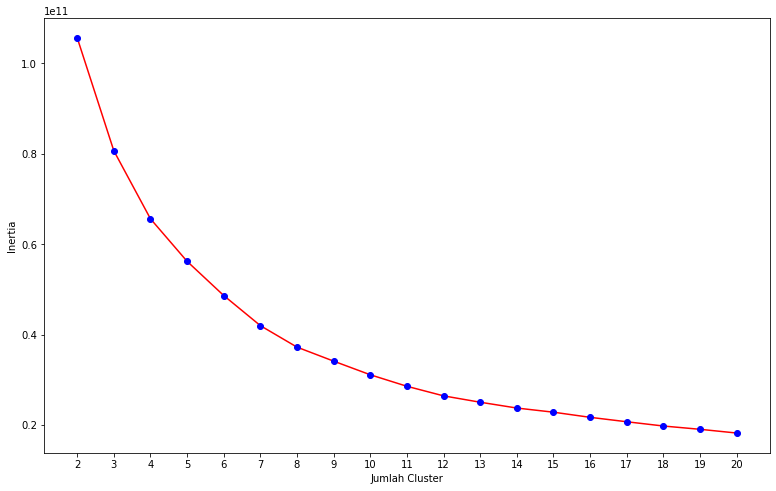

In [46]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score, 'r-')
plt.plot(np.arange(2, 21), score, 'bo')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.xticks(np.arange(2,21))
plt.show()

From Elbow score the best number of cluster is 5

#### - SILHOUETTE SCORE

In [47]:
score_KM = []

for i in range(2, 21):
    model_K = KMeans(n_clusters=i, random_state=42)
    cluster = model_K.fit_predict(X)
    score_KM.append(silhouette_score(X, cluster))

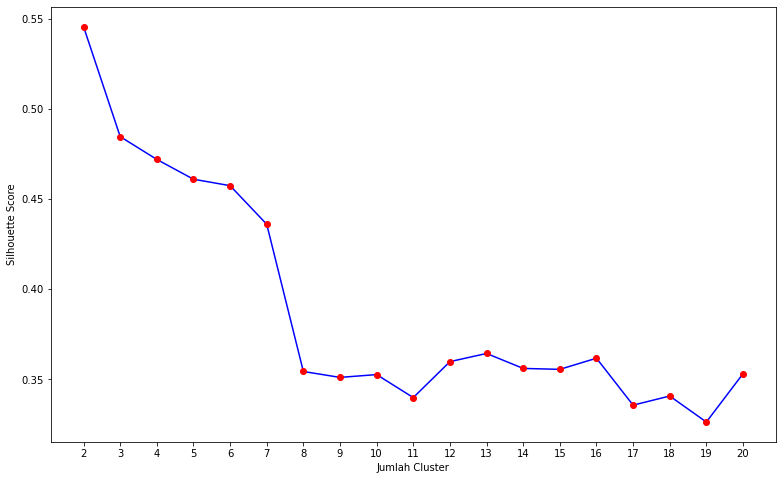

In [48]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_KM, 'b-')
plt.plot(np.arange(2, 21), score_KM, 'ro')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,21))
plt.show()

From Silhouette score, the best number of clusters is 2 with 0.55 score.

Yet, due to the product availability (3 products) we choose 3 clusters

### A2. KMEANS CLUSTERING

In [49]:
model_KM3 = KMeans(n_clusters=3, random_state=42)

In [50]:
model_KM3.fit_predict(X)

array([0, 1, 1, ..., 0, 0, 0])

In [51]:
clustersKM3 = model_KM3.fit_predict(X)

In [52]:
df_KM3 = df.copy()

In [53]:
df_KM3['SEGMENT'] = clustersKM3

In [54]:
df_KM3.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00       6442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2       1000.00   
1                    0.25                 4              0       7000.00   
2                    0.00                 0             12       7500.00   
3                    0.08                 1              1       7500.00   
4                    0.00                 0              1       1200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  SEGMENT  
0    201.80            139.51              0.00      12        0  
1   4103.03           1072.34              0.22      12        1  
2    622.07            627.28              0.00      12        1  
3      0.00              0.00              0.00      12        1  
4    678.33            244.79              0.00      12        0

In [55]:
df_KM3['SEGMENT'].value_counts()

0    5620
1    2654
2     675
Name: SEGMENT, dtype: int64

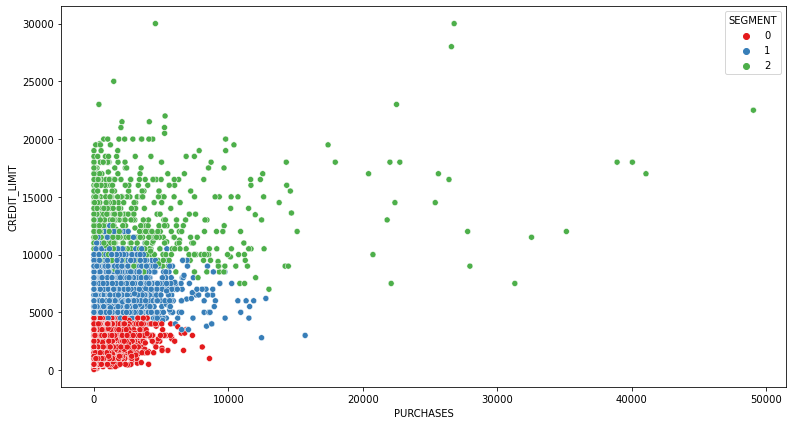

In [56]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'CREDIT_LIMIT', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

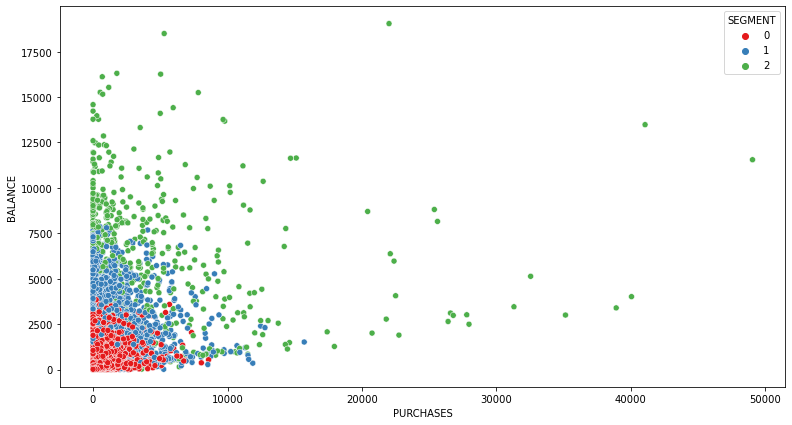

In [57]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'BALANCE', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

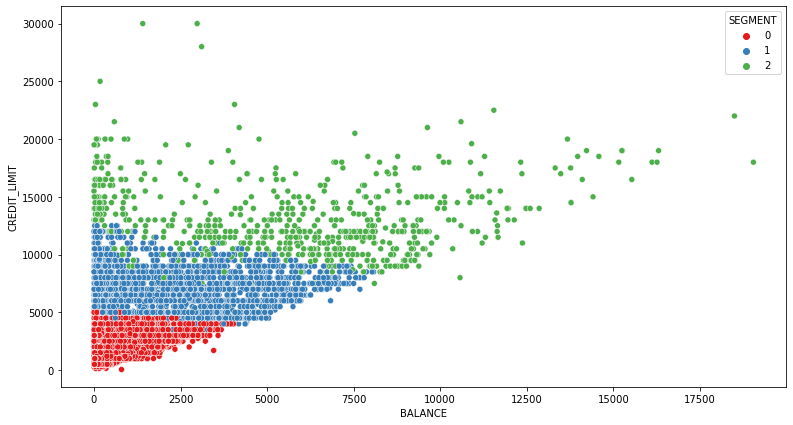

In [58]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

In [59]:
fig = px.scatter_3d(df_KM3, x='PURCHASES', y='BALANCE', z='CREDIT_LIMIT',
              color='SEGMENT', size_max=18, opacity=0.7)
fig.show()

## B. AHC MODEL CLUSTERING

### B1. IDEAL NUMBER OF CLUSTERS ANALYSIS

#### - SILHOUETTE SCORE

In [60]:
score_A = []

for i in range(2, 21):
    model_AHC = AgglomerativeClustering(n_clusters=i)
    cluster = model_AHC.fit_predict(X)
    score_A.append(silhouette_score(X, cluster))

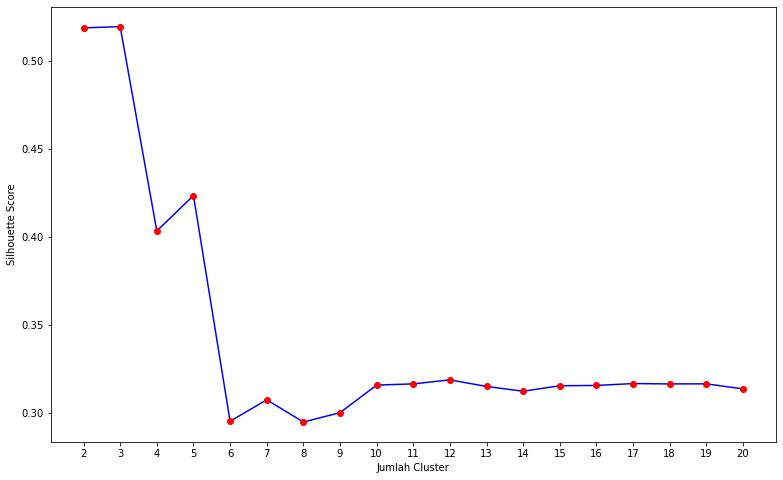

In [61]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_A, 'b-')
plt.plot(np.arange(2, 21), score_A, 'ro')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,21))
plt.show()

From Silhouette score, the best number of components (using Gaussian Mixture) is 2/3 with 0.52 Silhouette Score.\
Yet, due to the product availability (3 products) we choose 3 clusters

### B2. AHC CLUSTERING

In [62]:
ahc3 = AgglomerativeClustering(n_clusters=3)

In [63]:
clustersAHC3 = ahc3.fit_predict(X)

In [64]:
df_AHC3 = df.copy()

In [65]:
df_AHC3['SEGMENT'] = clustersAHC3

In [66]:
df_AHC3.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00       6442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2       1000.00   
1                    0.25                 4              0       7000.00   
2                    0.00                 0             12       7500.00   
3                    0.08                 1              1       7500.00   
4                    0.00                 0              1       1200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  SEGMENT  
0    201.80            139.51              0.00      12        1  
1   4103.03           1072.34              0.22      12        0  
2    622.07            627.28              0.00      12        0  
3      0.00              0.00              0.00      12        0  
4    678.33            244.79              0.00      12        1

In [67]:
df_AHC3['SEGMENT'].value_counts()

1    6541
0    2384
2      24
Name: SEGMENT, dtype: int64

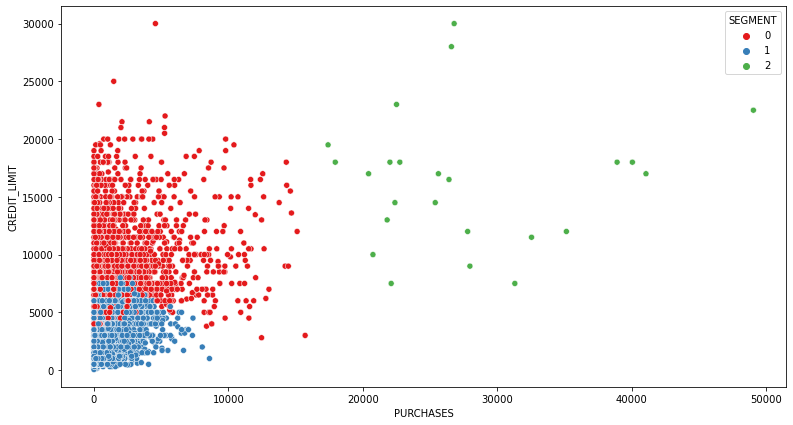

In [68]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'CREDIT_LIMIT', data=df_AHC3, hue = 'SEGMENT', palette='Set1')
plt.show()

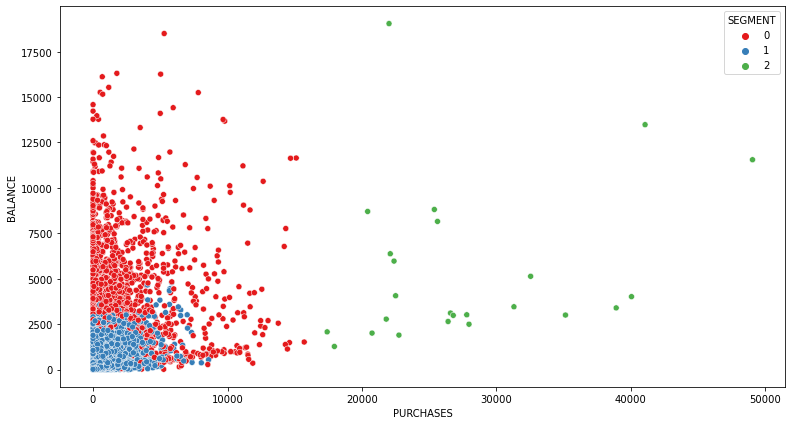

In [69]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'BALANCE', data=df_AHC3, hue = 'SEGMENT', palette='Set1')
plt.show()

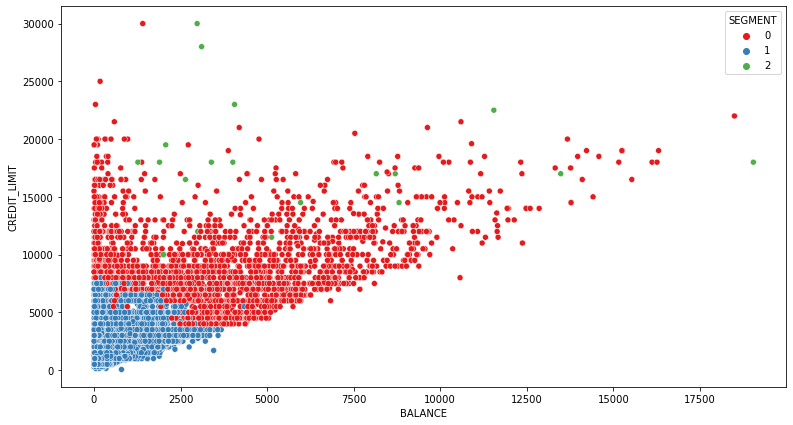

In [70]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', data=df_AHC3, hue = 'SEGMENT', palette='Set1')
plt.show()

In [71]:
fig = px.scatter_3d(df_AHC3, x='PURCHASES', y='BALANCE', z='CREDIT_LIMIT',
              color='SEGMENT', size_max=18, opacity=0.7)
fig.show()

## C. GAUSSIAN MIXTURE MODEL

### C1. IDEAL NUMBER OF CLUSTERS ANALYSIS

#### - SILHOUETTE SCORE

In [72]:
score_G = []

for i in range(2, 21):
    model_G = GaussianMixture(n_components=i)
    cluster = model_G.fit_predict(X)
    score_G.append(silhouette_score(X, cluster))

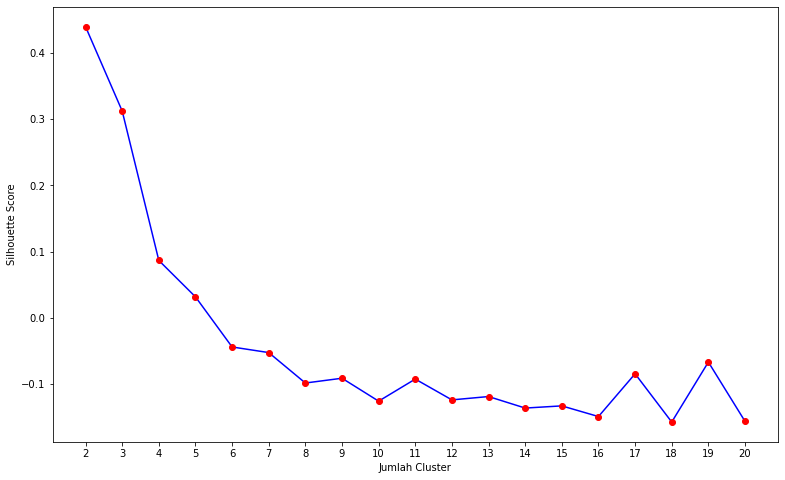

In [73]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_G, 'b-')
plt.plot(np.arange(2, 21), score_G, 'ro')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2,21))
plt.show()
# TANYA

From Silhouette score, the best number of components (using Gaussian Mixture) is 2 with 0.44 Silhouette Score.\
Yet, due to the product availability (3 products) we choose 3 clusters
**TANYA**

### C2. GAUSSIAN MIXTURE CLUSTERING

In [74]:
gm3 = GaussianMixture(n_components=3)

In [75]:
clustersGM3 = gm3.fit_predict(X)

In [76]:
df_GM3 = df.copy()

In [77]:
df_GM3['SEGMENT'] = clustersGM3

In [78]:
df_GM3.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40          0.00                 0.17   
1                    0.00       6442.95                 0.00   
2                    0.00          0.00                 1.00   
3                    0.00        205.79                 0.08   
4                    0.00          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                              0.08   
1                        0.00                              0.00   
2                        1.00                              0.00   
3                        0.08                              0.00   
4                        0.08                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2       1000.00   
1                    0.25                 4              0       7000.00   
2                    0.00                 0             12       7500.00   
3                    0.08                 1              1       7500.00   
4                    0.00                 0              1       1200.00   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  SEGMENT  
0    201.80            139.51              0.00      12        1  
1   4103.03           1072.34              0.22      12        0  
2    622.07            627.28              0.00      12        0  
3      0.00              0.00              0.00      12        0  
4    678.33            244.79              0.00      12        1

In [79]:
df_GM3['SEGMENT'].value_counts()

1    4175
0    3890
2     884
Name: SEGMENT, dtype: int64

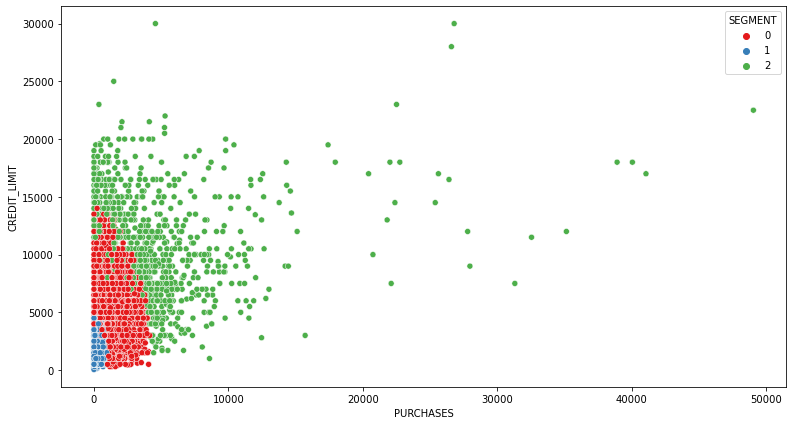

In [80]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'CREDIT_LIMIT', data=df_GM3, hue = 'SEGMENT', palette='Set1')
plt.show()

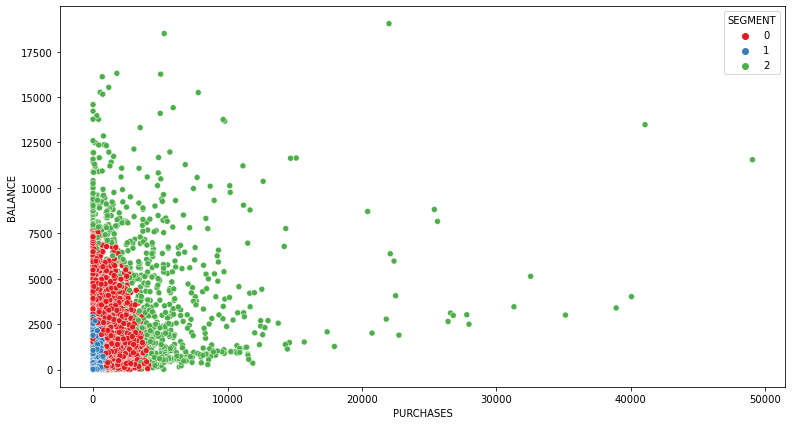

In [81]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'BALANCE', data=df_GM3, hue = 'SEGMENT', palette='Set1')
plt.show()

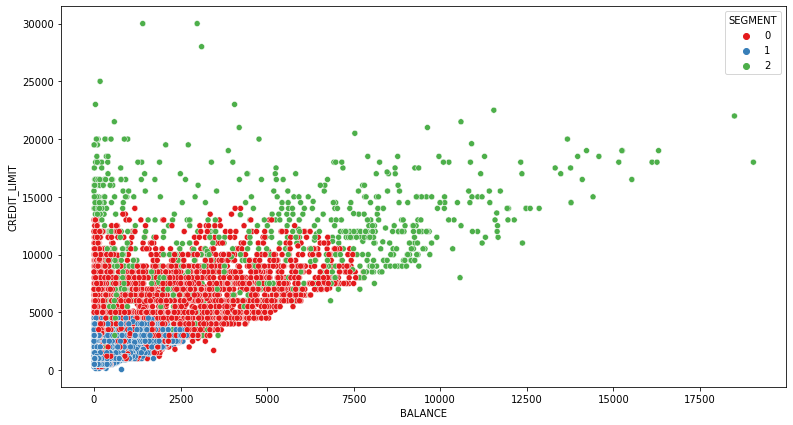

In [82]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', data=df_GM3, hue = 'SEGMENT', palette='Set1')
plt.show()

In [83]:
fig = px.scatter_3d(df_GM3, x='PURCHASES', y='BALANCE', z='CREDIT_LIMIT',
              color='SEGMENT', size_max=18, opacity=0.7)
fig.show()

===================================================================================================================

# CLUSTERING SUMMARY & INTERPRETATION

### - CLUSTERING ALGORITHM SUMMARY AND SELECTION

In [84]:
cluster_summary = [score_KM, score_A, score_G]

In [85]:
tab_clus_sum = pd.DataFrame(data = cluster_summary, columns=np.arange(2,21), index=['KMeans', 'AHC', 'Gaussian'] )
tab_clus_sum

2    3    4    5     6     7     8     9     10    11    12    13  \
KMeans   0.55 0.48 0.47 0.46  0.46  0.44  0.35  0.35  0.35  0.34  0.36  0.36   
AHC      0.52 0.52 0.40 0.42  0.30  0.31  0.29  0.30  0.32  0.32  0.32  0.32   
Gaussian 0.44 0.31 0.09 0.03 -0.04 -0.05 -0.10 -0.09 -0.13 -0.09 -0.12 -0.12   

            14    15    16    17    18    19    20  
KMeans    0.36  0.36  0.36  0.34  0.34  0.33  0.35  
AHC       0.31  0.32  0.32  0.32  0.32  0.32  0.31  
Gaussian -0.14 -0.13 -0.15 -0.08 -0.16 -0.07 -0.16

- From the Silhouette Score using three different methods (KMeans, AHC, Gaussian Mixsture), the best number of clusters obtained is 2.
- Nevertheless, we choose to use 3 clustering due to business demand and simulation.
- Within 3 clustering, AHC method has better Silhouette Score (0.52) compared to KMeans (0.48). However, we choose KMeans method because has better seperation of grouping 

### - CLUSTER INTERPRETATION

In [86]:
df_KM3['SEGMENT'].value_counts()

0    5620
1    2654
2     675
Name: SEGMENT, dtype: int64

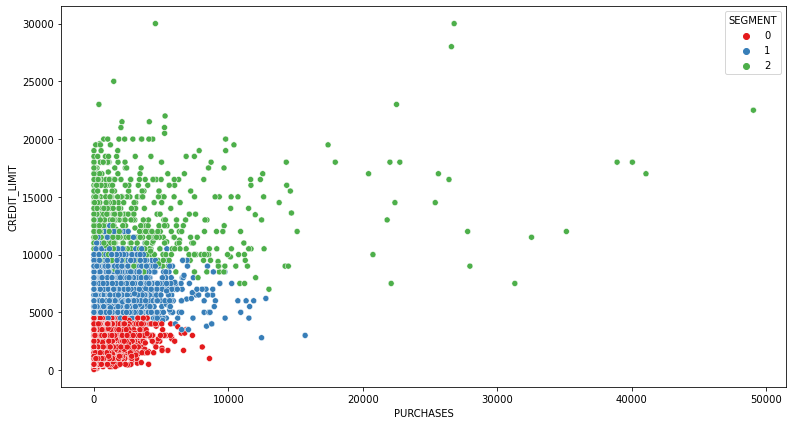

In [87]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'CREDIT_LIMIT', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

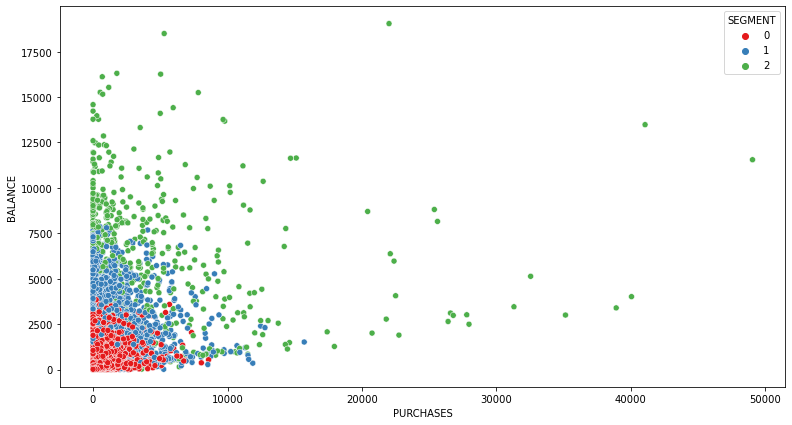

In [88]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'PURCHASES', y = 'BALANCE', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

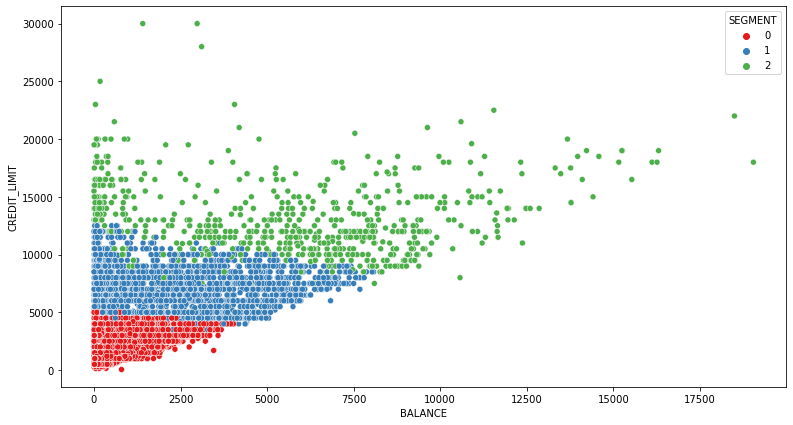

In [89]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', data=df_KM3, hue = 'SEGMENT', palette='Set1')
plt.show()

In [90]:
fig = px.scatter_3d(df_KM3, x='PURCHASES', y='BALANCE', z='CREDIT_LIMIT',
              color='SEGMENT', size_max=18, opacity=0.7)
fig.show()

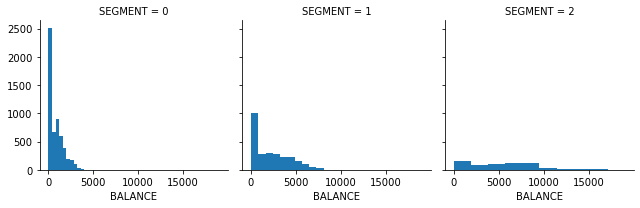

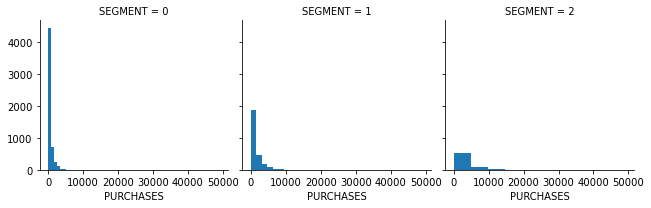

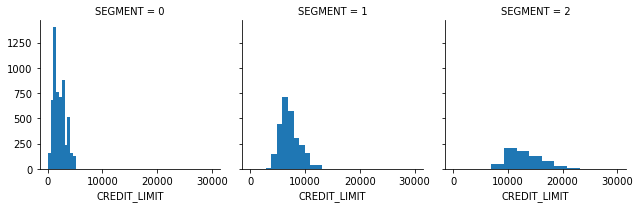

In [91]:
col = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']

for i in col:
    grid= sns.FacetGrid(df_KM3, col='SEGMENT')
    grid.map(plt.hist, i)

In [92]:
df_int = df_KM3[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'SEGMENT']]
df_int.head()

BALANCE  PURCHASES  CREDIT_LIMIT  SEGMENT
0    40.90      95.40       1000.00        0
1  3202.47       0.00       7000.00        1
2  2495.15     773.17       7500.00        1
3  1666.67    1499.00       7500.00        1
4   817.71      16.00       1200.00        0

In [93]:
df_int.groupby('SEGMENT').mean()

BALANCE  PURCHASES  CREDIT_LIMIT
SEGMENT                                  
0         805.20     548.64       2247.99
1        2174.54    1285.08       7041.03
2        5489.73    3681.10      13185.56

In [94]:
df_int.groupby('SEGMENT').min()

BALANCE  PURCHASES  CREDIT_LIMIT
SEGMENT                                  
0           0.00       0.00         50.00
1           0.00       0.00       2800.00
2           1.02       0.00       7000.00

In [95]:
df_int.groupby('SEGMENT').max()

BALANCE  PURCHASES  CREDIT_LIMIT
SEGMENT                                  
0        4028.04    8591.31       5100.00
1        8073.91   15704.04      13000.00
2       19043.14   49039.57      30000.00

#### BALANCE VS SEGMENT

In [96]:
df_bal = df_KM3.pivot_table(index='SEGMENT', values='BALANCE', aggfunc='mean').sort_values('BALANCE', ascending=False).reset_index()
df_bal

SEGMENT  BALANCE
0        2  5489.73
1        1  2174.54
2        0   805.20

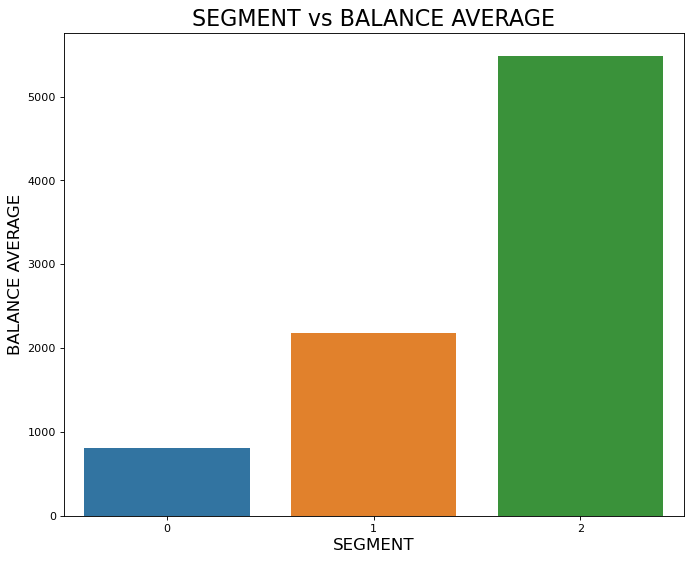

In [97]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'BALANCE', data = df_bal, estimator=sum)
plt.title('SEGMENT vs BALANCE AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("BALANCE AVERAGE", size = 15)
plt.show()

#### PURCHASES VS SEGMENT

In [98]:
df_pur = df_KM3.pivot_table(index='SEGMENT', values='PURCHASES', aggfunc='mean').sort_values('PURCHASES', ascending=False).reset_index()
df_pur

SEGMENT  PURCHASES
0        2    3681.10
1        1    1285.08
2        0     548.64

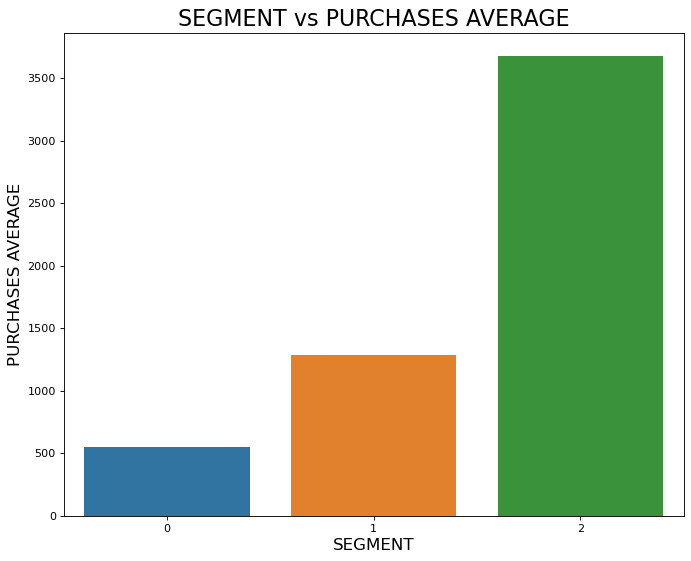

In [99]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'PURCHASES', data = df_pur, estimator=sum)
plt.title('SEGMENT vs PURCHASES AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("PURCHASES AVERAGE", size = 15)
plt.show()

#### CREDIT_LIMIT VS SEGMENT

In [100]:
df_cl = df_KM3.pivot_table(index='SEGMENT', values='CREDIT_LIMIT', aggfunc='mean').sort_values('CREDIT_LIMIT', ascending=False).reset_index()
df_cl

SEGMENT  CREDIT_LIMIT
0        2      13185.56
1        1       7041.03
2        0       2247.99

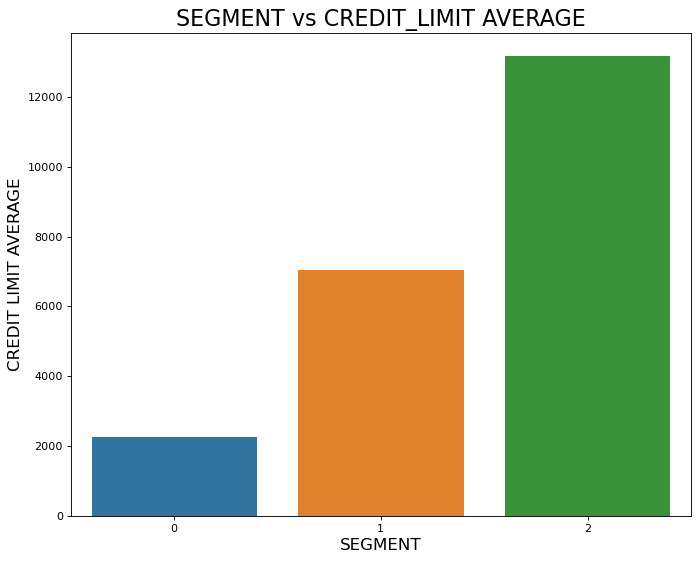

In [101]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'SEGMENT' , y = 'CREDIT_LIMIT', data = df_cl, estimator=sum)
plt.title('SEGMENT vs CREDIT_LIMIT AVERAGE', size =20)
plt.xlabel("SEGMENT",size = 15)
plt.ylabel("CREDIT LIMIT AVERAGE", size = 15)
plt.show()

### - CLUSTER SUMMARY

SEGMENT 0:
- SEGMENT 0 customer's BALANCE RANGE is 0 - 4028.03 dollars (LOW)
- SEGMENT 0 customer's BALANCE average is 805.2 dollars (LOW)
- SEGMENT 0 customer's PURCHASES RANGE is 0 - 8591.31 dollars (LOW)
- SEGMENT 0 customer's PURCHASES average is 548.64 dollars (LOW)
- SEGMENT 0 customer's CREDIT_LIMIT RANGE is 50 - 5100 dollars (LOW)
- SEGMENT 0 customer's CREDIT_LIMIT average is 2247.99 dollars (LOW)

SEGMENT 1:
- SEGMENT 1 customer's BALANCE RANGE is 0 - 8073.90 dollars (LOW-MEDIUM)
- SEGMENT 1 customer's BALANCE average is 2174.54 dollars (MEDIUM)
- SEGMENT 1 customer's PURCHASES RANGE is 0 - 15704.04 dollars (LOW-MEDIUM)
- SEGMENT 1 customer's PURCHASES average is 1285.08 dollars (MEDIUM)
- SEGMENT 1 customer's CREDIT_LIMIT RANGE is 2800 - 13000 dollars (MEDIUM)
- SEGMENT 1 customer's CREDIT_LIMIT average is 7041.03 dollars (MEDIUM)

SEGMENT 2:
- SEGMENT 2 customer's BALANCE RANGE is 1.01 - 19043.13 dollars (LOW-HIGH)
- SEGMENT 2 customer's BALANCE average 5489.73 dollars (HIGH)
- SEGMENT 2 customer's PURCHASES RANGE is 0 - 49039.57 dollars (LOW-HIGH)
- SEGMENT 2 customer's PURCHASES average is 3681.1 dollars (HIGH)
- SEGMENT 2 customer's CREDIT_LIMIT RANGE is 7000 - 30000 dollars (HIGH)
- SEGMENT 2 customer's CREDIT_LIMIT average is 13185.56 dollars (HIGH)

From Insight Above we can conclude:
* **SEGMENT 0 : LOW CUSTOMERS** This customer group indicates a large group of customers who have LOW BALANCES, small spenders (LOW PURCHASES) with the LOWEST CREDIT LIMIT. 

* **SEGMENT 1 : MEDIUM CUSTOMERS** This customer group indicates a small group of customers who have LOW-MEDIUM BALANCES, intermediate spenders (LOW-MEDIUM PURCHASES) with intermediate CREDIT LIMIT.

* **SEGMENT 2 : HIGH CUSTOMERS** This customer group indicates a small group of customers who have LOW-HIGH BALANCES, high spenders (LOW-HIGH PURCHASES) with HIGH CREDIT LIMIT.

===================================================================================================================

## BUSINESS SUGGESTION

#### DETAIL PRODUCT SUGGESTION:

- PERFORMANCE CREDIT CARD DETAIL PRODUCT:
    - GET REWARDS with Monthly Minimum Purchases 500 dollars
    - CREDIT_LIMIT: 5000


- BUSINESS CASH CREDIT CARD DETAIL PRODUCT:
    - GET REWARDS with Monthly Minimum Purchases 1200 dollars
    - CREDIT_LIMIT: 13000
    
- BUSINESS UNLIMITED CREDIT CARD DETAIL PRODUCT:
    - GET REWARDS with Monthly Minimum Purchases 3500 dollars
    - CREDIT_LIMIT: 30000

We Suggest:
- Offer LOW CUSTOMERS SEGMENT with PERFORMANCE CREDIT CARD
- Offer MEDIUM CUSTOMERS SEGMENT with BUSINESS CASH CREDIT CARD
- Offer HIGH CUSTOMERS SEGMENT with BUSINESS UNLIMITED CREDIT CARD

# EXPORT DATA

In [102]:
df_KM3.to_csv('CCCLEAN.csv', index=False)

===================================================================================================================